## World Happiness Report 

#### The data is based on asking a sample of people from all over the world how happy they believed themselves to be from a score of 1 - 10  happiness score. They were also asked how several factors played a part in that score. The data was taken between 2015 and 2019

In [245]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.image as img
import requests
import urllib
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

In [246]:
happy15_df = pd.read_csv("Documents/happydata/2015.csv")

In [247]:
happy16_df = pd.read_csv("Documents/happydata/2016.csv")

In [248]:
happy17_df = pd.read_csv("Documents/happydata/2017.csv")

In [249]:
happy18_df = pd.read_csv("Documents/happydata/2018.csv")

In [250]:
happy19_df = pd.read_csv("Documents/happydata/2019.csv")

In [251]:
happy15_df.shape

(158, 12)

In [252]:
happy16_df.shape

(157, 13)

In [253]:
happy17_df.shape

(155, 12)

In [254]:
happy18_df.shape

(156, 9)

In [255]:
happy19_df.shape

(156, 9)

In [256]:
happy15_df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [257]:
happy15_df.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [258]:
happy16_df.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [259]:
happy16_df.tail()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789
156,Burundi,Sub-Saharan Africa,157,2.905,2.732,3.078,0.06831,0.23442,0.15747,0.04320,0.09419,0.20290,2.10404


In [260]:
happy17_df.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [261]:
happy17_df.tail()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
150,Rwanda,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061
151,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574
152,Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130
153,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024
154,Central African Republic,155,2.693,2.864884,2.521116,0.000000,0.000000,0.018773,0.270842,0.280876,0.056565,2.066005


In [262]:
happy18_df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [263]:
happy18_df.tail()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
151,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064
152,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097
153,154,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038
155,156,Burundi,2.905,0.091,0.627,0.145,0.065,0.149,0.076


In [264]:
happy19_df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [265]:
happy19_df.tail()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035
155,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091


### clean data 

In [266]:
happy15_df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [267]:
happy16_df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [268]:
happy17_df.isnull().sum()

Country                          0
Happiness.Rank                   0
Happiness.Score                  0
Whisker.high                     0
Whisker.low                      0
Economy..GDP.per.Capita.         0
Family                           0
Health..Life.Expectancy.         0
Freedom                          0
Generosity                       0
Trust..Government.Corruption.    0
Dystopia.Residual                0
dtype: int64

In [269]:
happy18_df.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       1
dtype: int64

In [270]:
happy19_df.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

### Top 10 happiest countries of 2015 - 2019

In [271]:
happy15_df['Country'].head(10)

0    Switzerland
1        Iceland
2        Denmark
3         Norway
4         Canada
5        Finland
6    Netherlands
7         Sweden
8    New Zealand
9      Australia
Name: Country, dtype: object

In [272]:
happy16_df['Country'].head(10)

0        Denmark
1    Switzerland
2        Iceland
3         Norway
4        Finland
5         Canada
6    Netherlands
7    New Zealand
8      Australia
9         Sweden
Name: Country, dtype: object

In [273]:
happy17_df['Country'].head(10)

0         Norway
1        Denmark
2        Iceland
3    Switzerland
4        Finland
5    Netherlands
6         Canada
7    New Zealand
8         Sweden
9      Australia
Name: Country, dtype: object

In [274]:
happy18_df['Country or region'].head(10)

0        Finland
1         Norway
2        Denmark
3        Iceland
4    Switzerland
5    Netherlands
6         Canada
7    New Zealand
8         Sweden
9      Australia
Name: Country or region, dtype: object

In [275]:
happy19_df['Country or region'].head(10)

0        Finland
1        Denmark
2         Norway
3        Iceland
4    Netherlands
5    Switzerland
6         Sweden
7    New Zealand
8         Canada
9        Austria
Name: Country or region, dtype: object

### Least happiest countries of 2015 - 2019 

In [276]:
happy15_df['Country'].tail(10)

148            Chad
149          Guinea
150     Ivory Coast
151    Burkina Faso
152     Afghanistan
153          Rwanda
154           Benin
155           Syria
156         Burundi
157            Togo
Name: Country, dtype: object

In [277]:
happy16_df['Country'].tail(10)

147     Madagascar
148       Tanzania
149        Liberia
150         Guinea
151         Rwanda
152          Benin
153    Afghanistan
154           Togo
155          Syria
156        Burundi
Name: Country, dtype: object

In [278]:
happy17_df['Country'].tail(10)

145                       Yemen
146                 South Sudan
147                     Liberia
148                      Guinea
149                        Togo
150                      Rwanda
151                       Syria
152                    Tanzania
153                     Burundi
154    Central African Republic
Name: Country, dtype: object

In [279]:
happy18_df['Country or region'].tail(10)

146                      Malawi
147                       Haiti
148                     Liberia
149                       Syria
150                      Rwanda
151                       Yemen
152                    Tanzania
153                 South Sudan
154    Central African Republic
155                     Burundi
Name: Country or region, dtype: object

In [280]:
happy19_df['Country or region'].tail(10)

146                       Haiti
147                    Botswana
148                       Syria
149                      Malawi
150                       Yemen
151                      Rwanda
152                    Tanzania
153                 Afghanistan
154    Central African Republic
155                 South Sudan
Name: Country or region, dtype: object

### Exploratory Data Analysis **EDA** 

#### correlation with happiness score for years 2015 - 2019

In [281]:
corr15 = happy15_df.corr()
corr16 = happy16_df.corr()
corr17 = happy17_df.corr()
corr18 = happy18_df.corr()
corr19 = happy19_df.corr()

In [282]:
corr15.style.background_gradient(cmap='coolwarm')

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


In [283]:
corr16.style.background_gradient(cmap='coolwarm')

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.995743,-0.994928,-0.995525,-0.793577,-0.733276,-0.767991,-0.557169,-0.387102,-0.145369,-0.542616
Happiness Score,-0.995743,1.000000,0.999485,0.999474,0.790322,0.739252,0.765384,0.566827,0.402032,0.156848,0.543738
Lower Confidence Interval,-0.994928,0.999485,1.000000,0.997919,0.790673,0.741523,0.769177,0.566857,0.404840,0.158025,0.538793
Upper Confidence Interval,-0.995525,0.999474,0.997919,1.000000,0.789140,0.736184,0.760752,0.566203,0.398775,0.155495,0.548164
Economy (GDP per Capita),-0.793577,0.790322,0.790673,0.789140,1.000000,0.669540,0.837067,0.362283,0.294185,-0.025531,0.068624
Family,-0.733276,0.739252,0.741523,0.736184,0.669540,1.000000,0.588377,0.450208,0.213561,0.089629,0.119672
Health (Life Expectancy),-0.767991,0.765384,0.769177,0.760752,0.837067,0.588377,1.000000,0.341199,0.249583,0.075987,0.100857
Freedom,-0.557169,0.566827,0.566857,0.566203,0.362283,0.450208,0.341199,1.000000,0.502054,0.361751,0.091631
Trust (Government Corruption),-0.387102,0.402032,0.404840,0.398775,0.294185,0.213561,0.249583,0.502054,1.000000,0.305930,-0.002909
Generosity,-0.145369,0.156848,0.158025,0.155495,-0.025531,0.089629,0.075987,0.361751,0.305930,1.000000,-0.133001


In [284]:
corr17.style.background_gradient(cmap='coolwarm')

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
Happiness.Rank,1.000000,-0.992774,-0.993058,-0.991533,-0.813244,-0.736753,-0.780716,-0.551608,-0.132620,-0.405842,-0.484506
Happiness.Score,-0.992774,1.000000,0.999497,0.999520,0.812469,0.752737,0.781951,0.570137,0.155256,0.429080,0.475355
Whisker.high,-0.993058,0.999497,1.000000,0.998036,0.811868,0.750934,0.776634,0.569907,0.155462,0.426459,0.478824
Whisker.low,-0.991533,0.999520,0.998036,1.000000,0.812267,0.753767,0.786385,0.569808,0.154904,0.431223,0.471505
Economy..GDP.per.Capita.,-0.813244,0.812469,0.811868,0.812267,1.000000,0.688296,0.843077,0.369873,-0.019011,0.350944,0.024226
Family,-0.736753,0.752737,0.750934,0.753767,0.688296,1.000000,0.612080,0.424966,0.051693,0.231841,0.070506
Health..Life.Expectancy.,-0.780716,0.781951,0.776634,0.786385,0.843077,0.612080,1.000000,0.349827,0.063191,0.279752,0.054963
Freedom,-0.551608,0.570137,0.569907,0.569808,0.369873,0.424966,0.349827,1.000000,0.316083,0.499183,0.081926
Generosity,-0.132620,0.155256,0.155462,0.154904,-0.019011,0.051693,0.063191,0.316083,1.000000,0.294159,-0.116627
Trust..Government.Corruption.,-0.405842,0.429080,0.426459,0.431223,0.350944,0.231841,0.279752,0.499183,0.294159,1.000000,-0.022755


In [285]:
corr18.style.background_gradient(cmap='coolwarm')

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,1.000000,-0.991749,-0.805897,-0.737500,-0.778700,-0.530786,-0.103602,-0.371133
Score,-0.991749,1.000000,0.802124,0.745760,0.775814,0.544280,0.135825,0.405292
GDP per capita,-0.805897,0.802124,1.000000,0.672080,0.844273,0.332275,-0.011241,0.319582
Social support,-0.737500,0.745760,0.672080,1.000000,0.667288,0.411087,0.018226,0.218364
Healthy life expectancy,-0.778700,0.775814,0.844273,0.667288,1.000000,0.355475,0.020751,0.315569
Freedom to make life choices,-0.530786,0.544280,0.332275,0.411087,0.355475,1.000000,0.297988,0.462446
Generosity,-0.103602,0.135825,-0.011241,0.018226,0.020751,0.297988,1.000000,0.362249
Perceptions of corruption,-0.371133,0.405292,0.319582,0.218364,0.315569,0.462446,0.362249,1.000000


In [286]:
corr19.style.background_gradient(cmap='coolwarm')

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,1.000000,-0.989096,-0.801947,-0.767465,-0.787411,-0.546606,-0.047993,-0.351959
Score,-0.989096,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
GDP per capita,-0.801947,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
Social support,-0.767465,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
Healthy life expectancy,-0.787411,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
Freedom to make life choices,-0.546606,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
Generosity,-0.047993,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
Perceptions of corruption,-0.351959,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


#### There is a strong correlation of economy, health and social support with a person rating how happy they are. There is somewhat of a correlation of happiness with the freedom to make life choices and no perceived correlation of generosity on happiness.

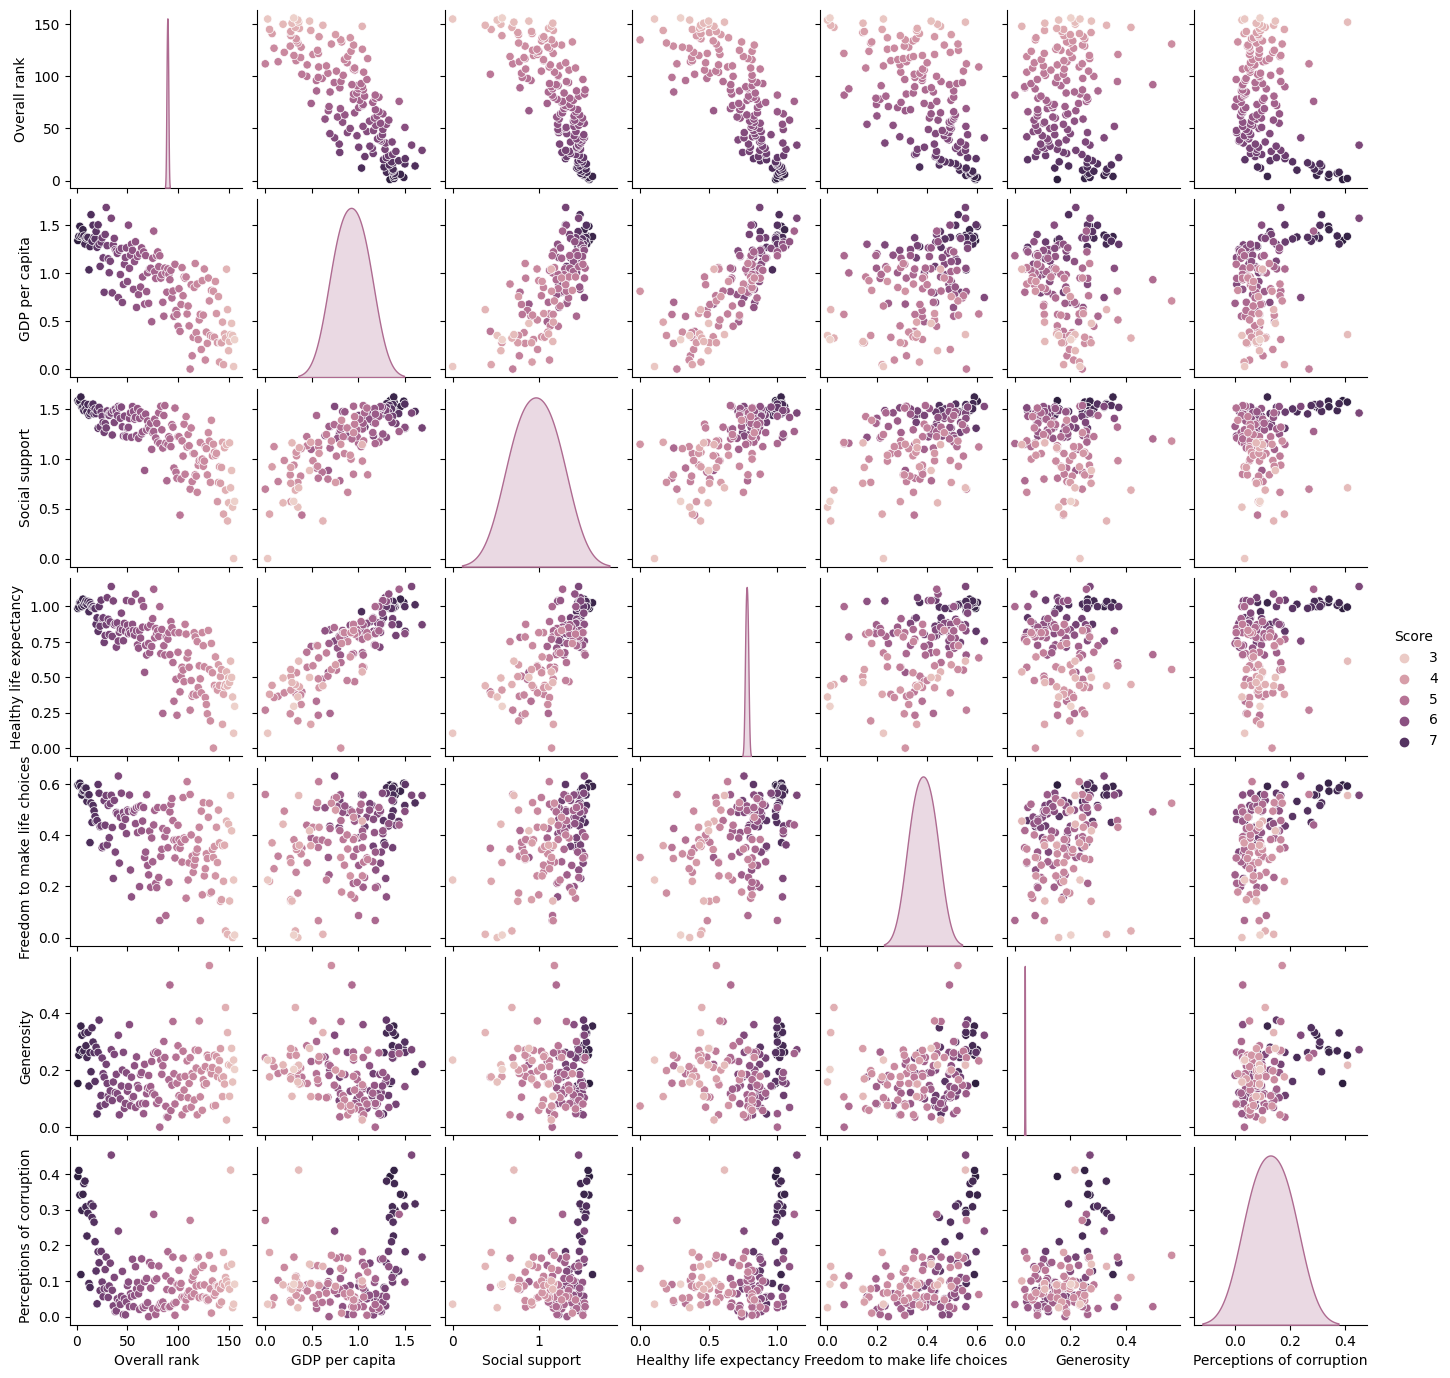

In [289]:
sns.pairplot(happy19_df, height=2, hue="Score")

In [300]:
sns.lmplot(x="Social support", y="Happiness Score", data=happy15_df)

KeyError: "['Social support'] not in index"

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Score', ylabel='Density'>

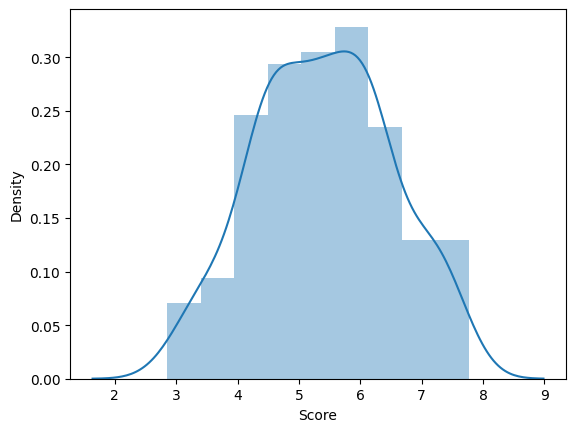

In [297]:
sns.distplot(happy19_df['Score'] )

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GDP per capita', ylabel='Density'>

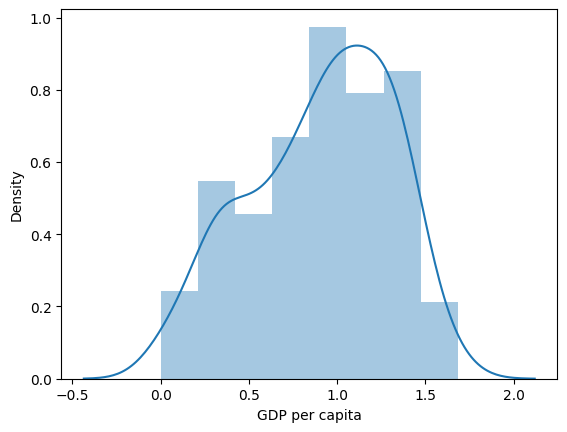

In [298]:
sns.distplot(happy19_df['GDP per capita'] )

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Social support', ylabel='Density'>

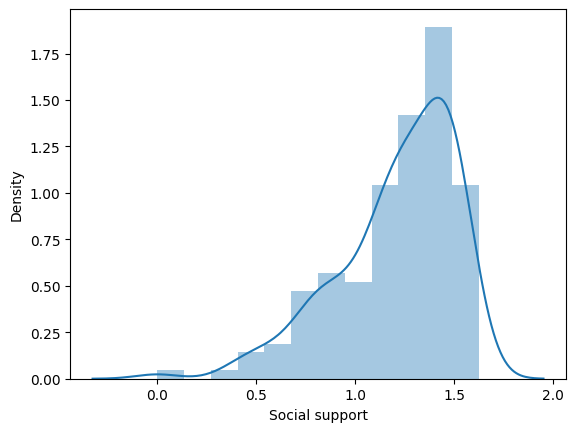

In [299]:
sns.distplot(happy19_df['Social support'] )

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Healthy life expectancy', ylabel='Density'>

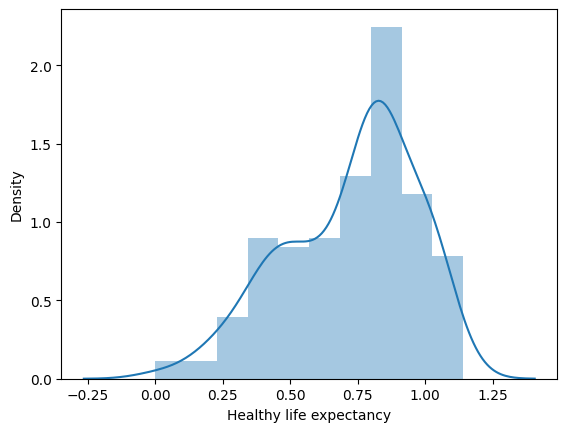

In [301]:
sns.distplot(happy19_df['Healthy life expectancy'] )

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Freedom to make life choices', ylabel='Density'>

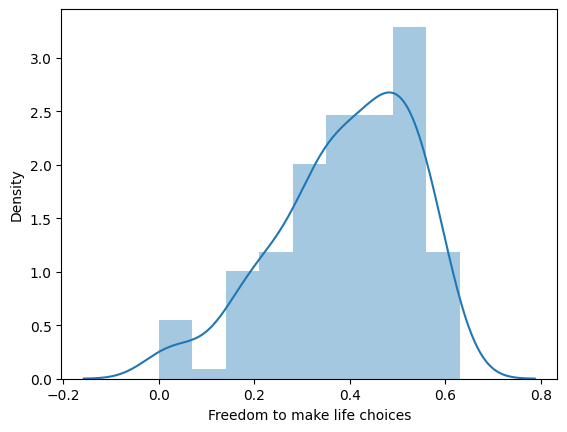

In [302]:
sns.distplot(happy19_df['Freedom to make life choices'] )

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Generosity', ylabel='Density'>

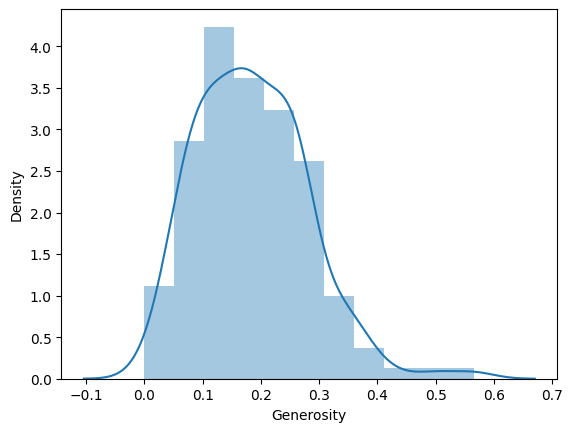

In [303]:
sns.distplot(happy19_df['Generosity'] )

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Perceptions of corruption', ylabel='Density'>

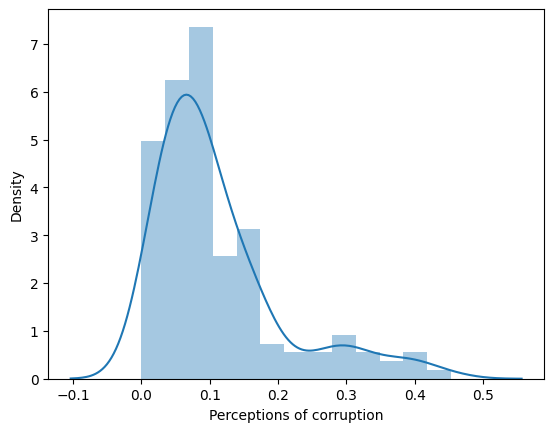

In [304]:
sns.distplot(happy19_df['Perceptions of corruption'] )

### Distribution of happiness score on regions of the world 2015 - 2016 

<AxesSubplot:xlabel='Happiness Score', ylabel='Region'>

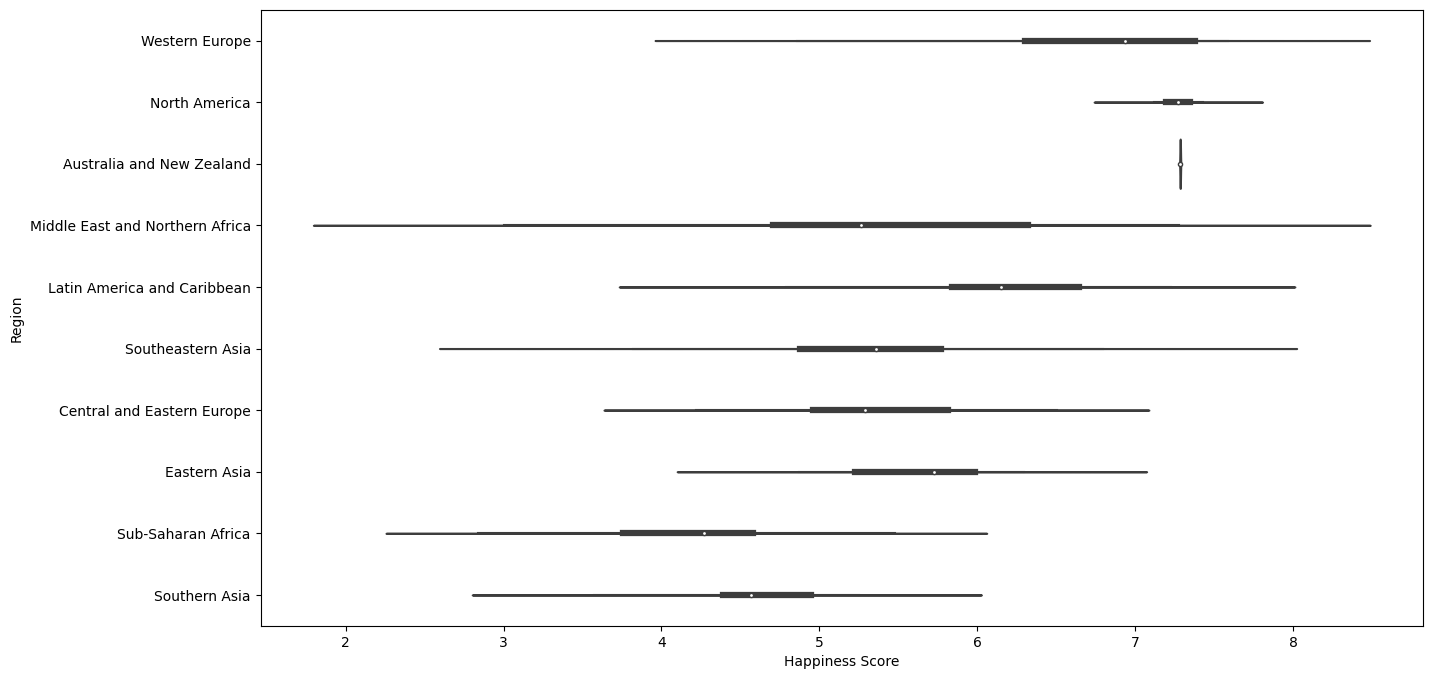

In [306]:
plt.figure(figsize=(15, 8))
sns.violinplot(data=happy15_df, y='Region', x='Happiness Score')

<AxesSubplot:xlabel='Happiness Score', ylabel='Region'>

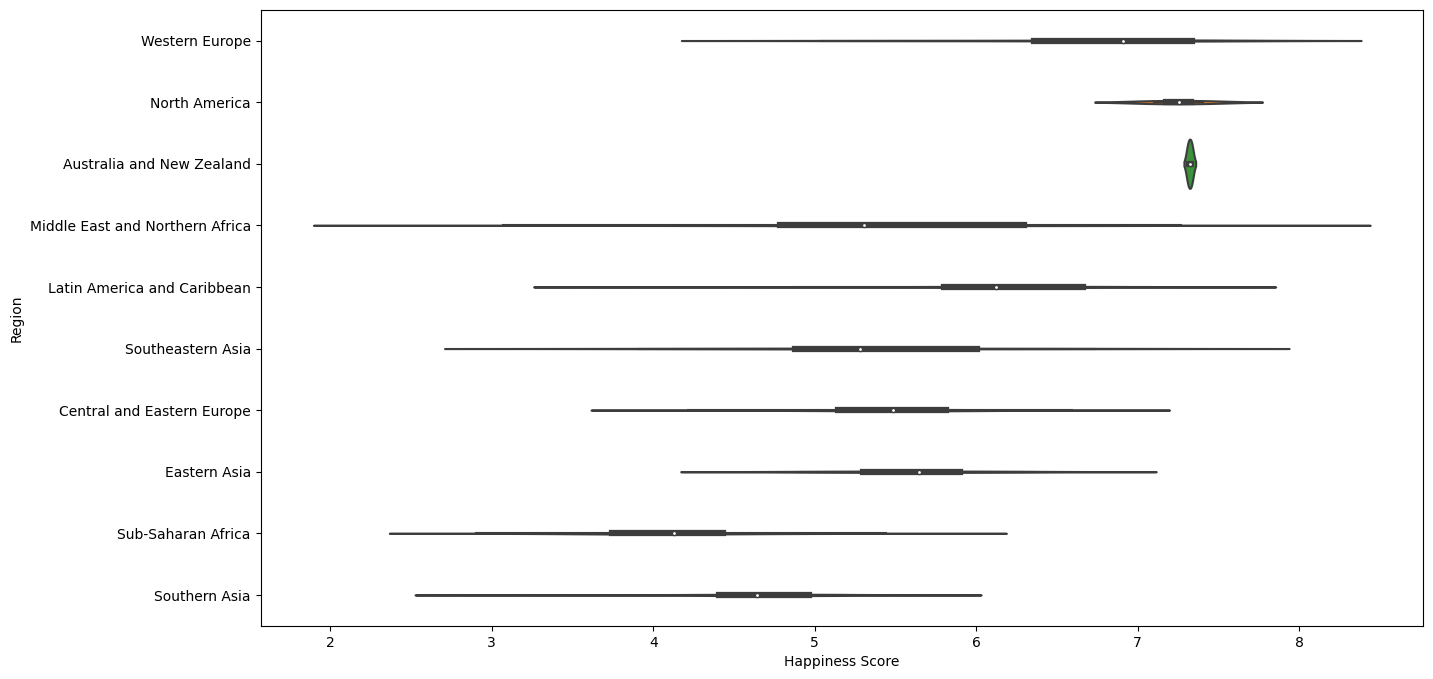

In [307]:
plt.figure(figsize=(15, 8))
sns.violinplot(data=happy16_df, y='Region', x='Happiness Score')

<AxesSubplot:xlabel='Happiness Score', ylabel='Region'>

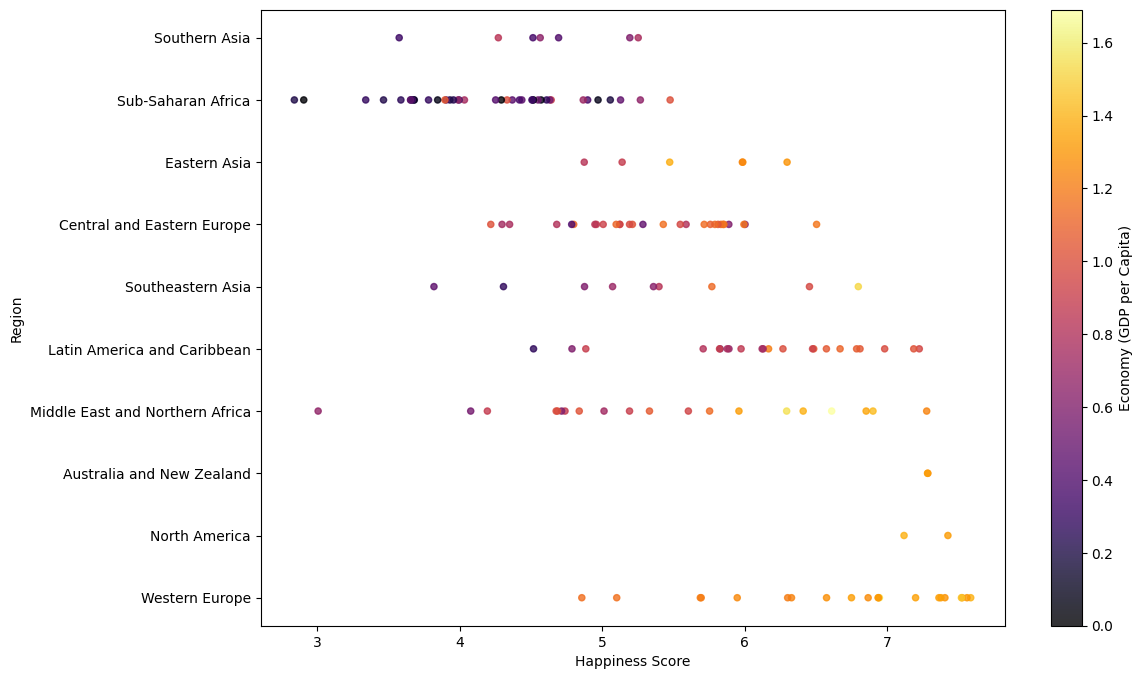

In [308]:
happy15_df.plot(
    kind="scatter", 
    y='Region', 
    x='Happiness Score', 
    c='Economy (GDP per Capita)', 
    cmap='inferno', 
    colorbar=True, 
    alpha=0.8,
    figsize=(12, 8))

<AxesSubplot:xlabel='Happiness Score', ylabel='Region'>

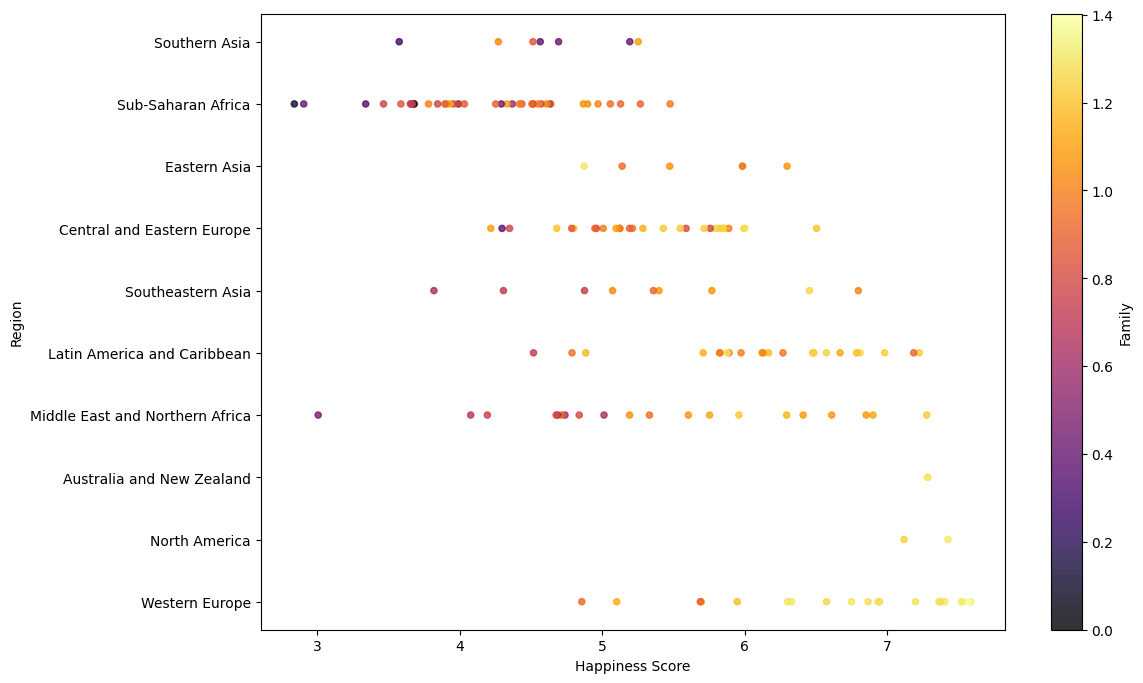

In [309]:
happy15_df.plot(
    kind="scatter", 
    y='Region', 
    x='Happiness Score', 
    c='Family', 
    cmap='inferno', 
    colorbar=True, 
    alpha=0.8,
    figsize=(12, 8))

<AxesSubplot:xlabel='Happiness Score', ylabel='Region'>

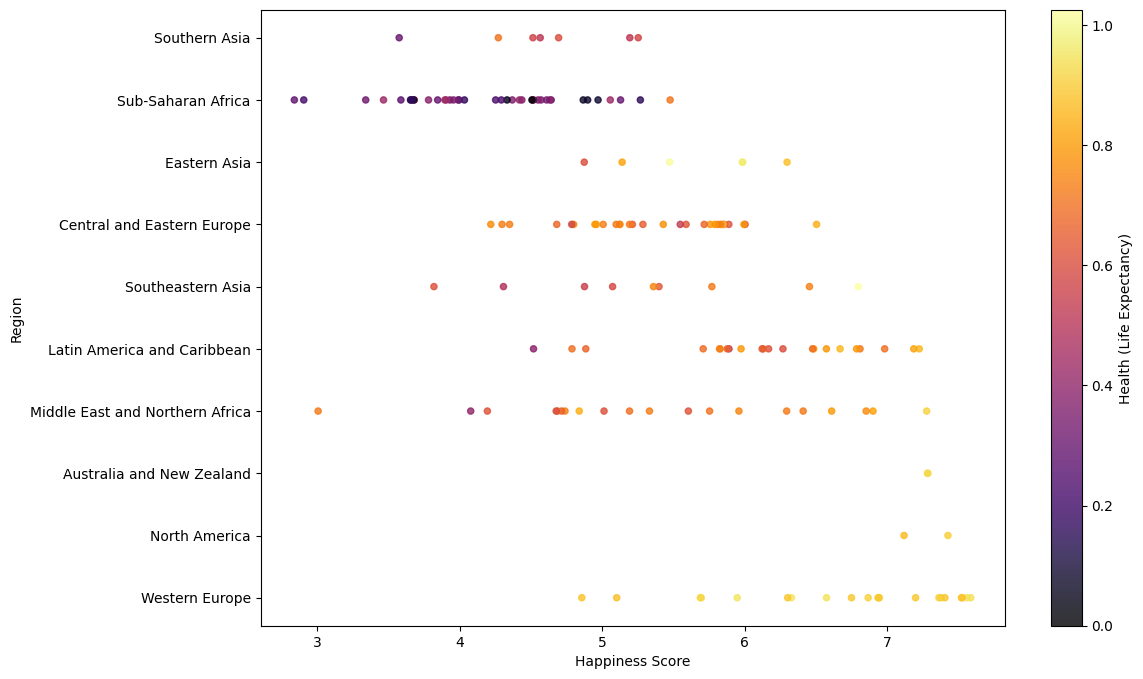

In [310]:
happy15_df.plot(
    kind="scatter", 
    y='Region', 
    x='Happiness Score', 
    c='Health (Life Expectancy)', 
    cmap='inferno', 
    colorbar=True, 
    alpha=0.8,
    figsize=(12, 8))

<AxesSubplot:xlabel='Happiness Score', ylabel='Region'>

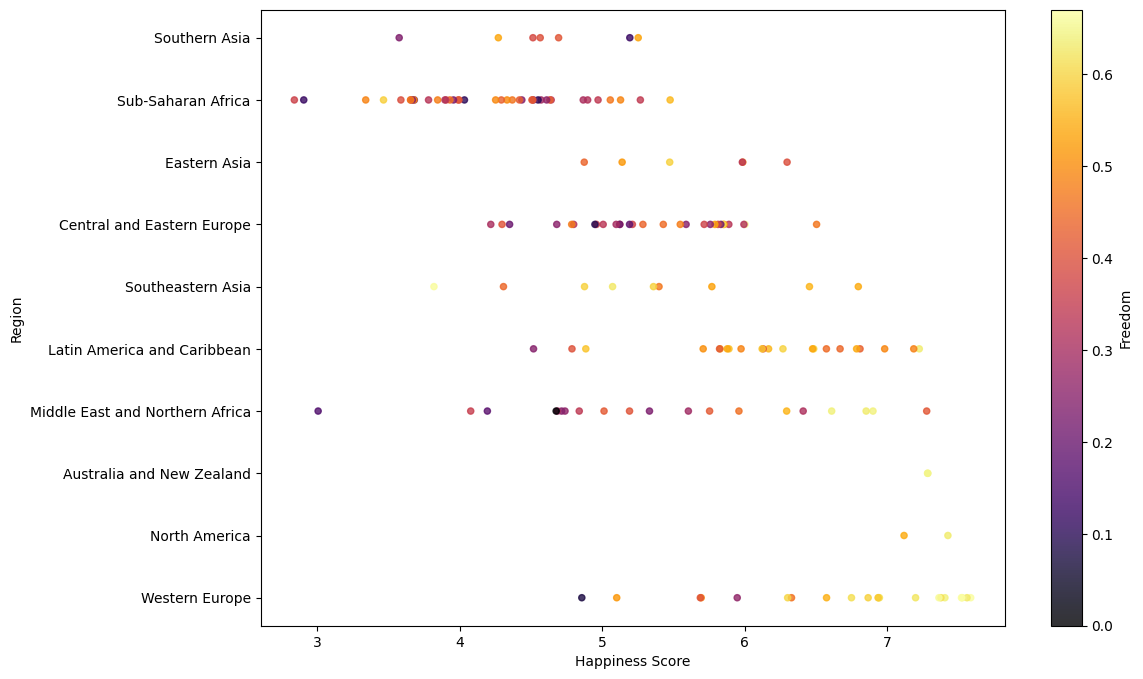

In [311]:
happy15_df.plot(
    kind="scatter", 
    y='Region', 
    x='Happiness Score', 
    c='Freedom', 
    cmap='inferno', 
    colorbar=True, 
    alpha=0.8,
    figsize=(12, 8))

<AxesSubplot:xlabel='Happiness Score', ylabel='Region'>

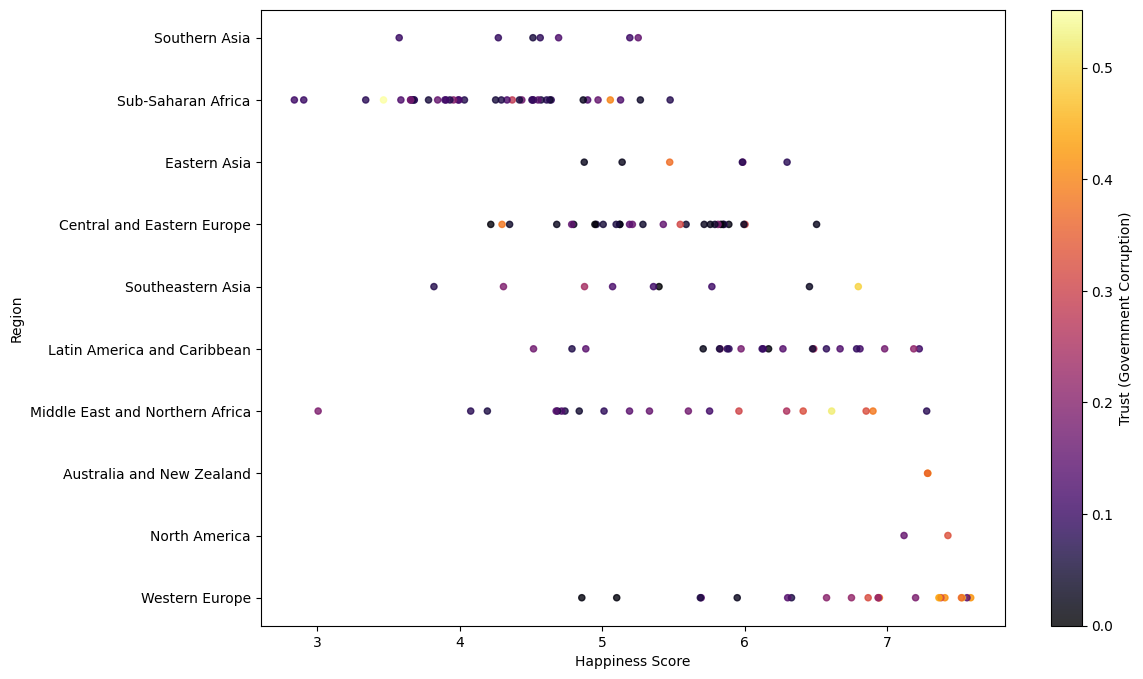

In [312]:
happy15_df.plot(
    kind="scatter", 
    y='Region', 
    x='Happiness Score', 
    c='Trust (Government Corruption)', 
    cmap='inferno', 
    colorbar=True, 
    alpha=0.8,
    figsize=(12, 8))

<AxesSubplot:xlabel='Happiness Score', ylabel='Region'>

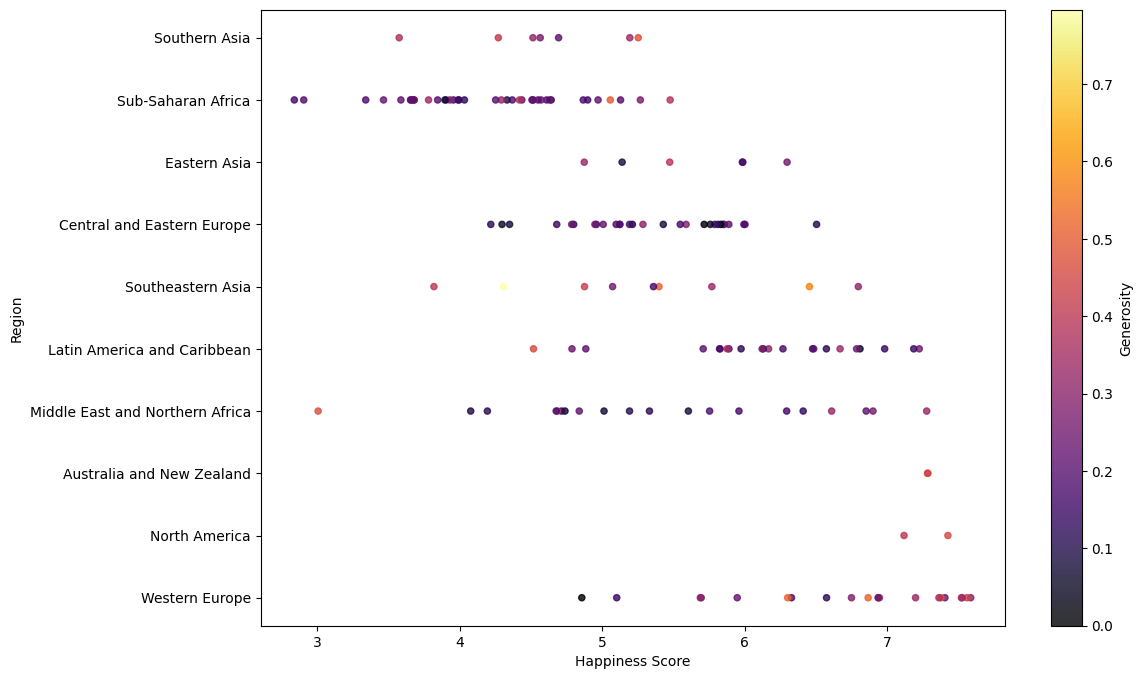

In [313]:
happy15_df.plot(
    kind="scatter", 
    y='Region', 
    x='Happiness Score', 
    c='Generosity', 
    cmap='inferno', 
    colorbar=True, 
    alpha=0.8,
    figsize=(12, 8))

<AxesSubplot:xlabel='Happiness Score', ylabel='Region'>

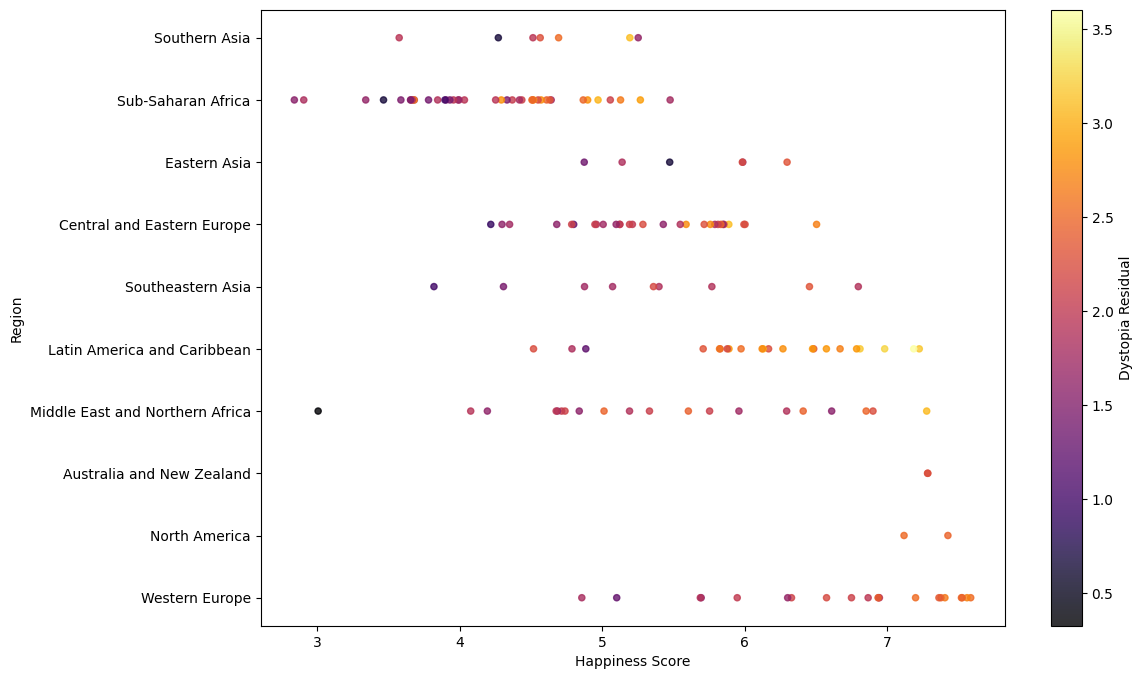

In [314]:
happy15_df.plot(
    kind="scatter", 
    y='Region', 
    x='Happiness Score', 
    c='Dystopia Residual', 
    cmap='inferno', 
    colorbar=True, 
    alpha=0.8,
    figsize=(12, 8))

# Conclusion 

#### The economy, health and social support are perceived to be important factors by people in contributing to happiness.  The highest happiness scores are by people in western countries.